En el archivo crime_data.csv se encuentra el número de crímenes por cada 100.000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población que es urbana. Los crímenes se han agrupado en: asalto, asesinato y violación.

**Segmenta este conjunto de datos utilizando k-means y obtén los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv("crime_data.csv")
dataframe.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
dataframe.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
df_norm = (dataframe.iloc[:,1:]-dataframe.iloc[:,1:].min())/(dataframe.iloc[:,1:].max()-dataframe.iloc[:,1:].min())
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [5]:
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

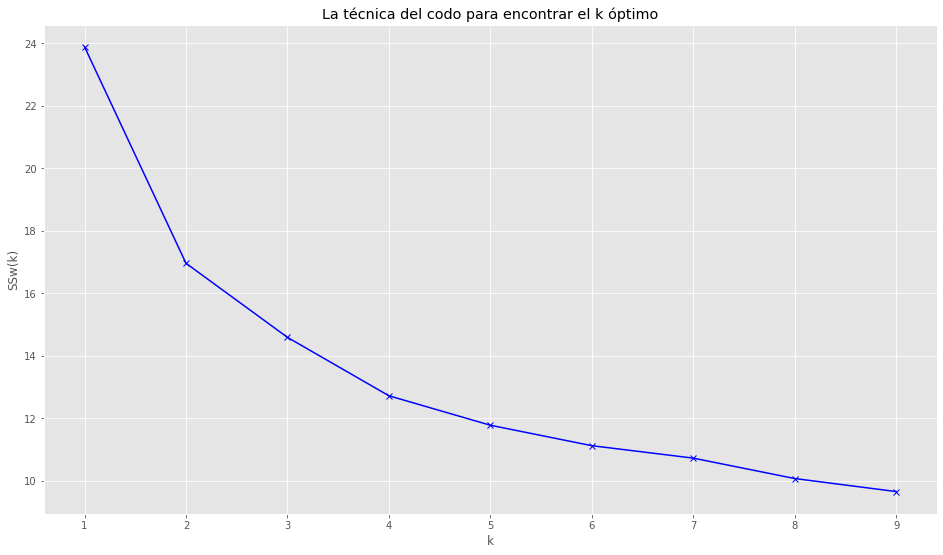

In [6]:
max_k = 10 ## maximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []
cmap = cm.get_cmap("Spectral")

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_norm)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(df_norm, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

Lo hecho anteriormente es el metodo del codo, sirve para que en el punto en el que se observa el cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese data set; o dicho de otra manera: el punto que representaría al codo del brazo será el número óptimo de Clusters para ese data set.

En este caso el numero óptimo de clusters es 2

In [7]:
X = np.array(dataframe[["Murder","Assault","UrbanPop","Rape"]])
y = np.array(dataframe['State'])
X.shape

(50, 4)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


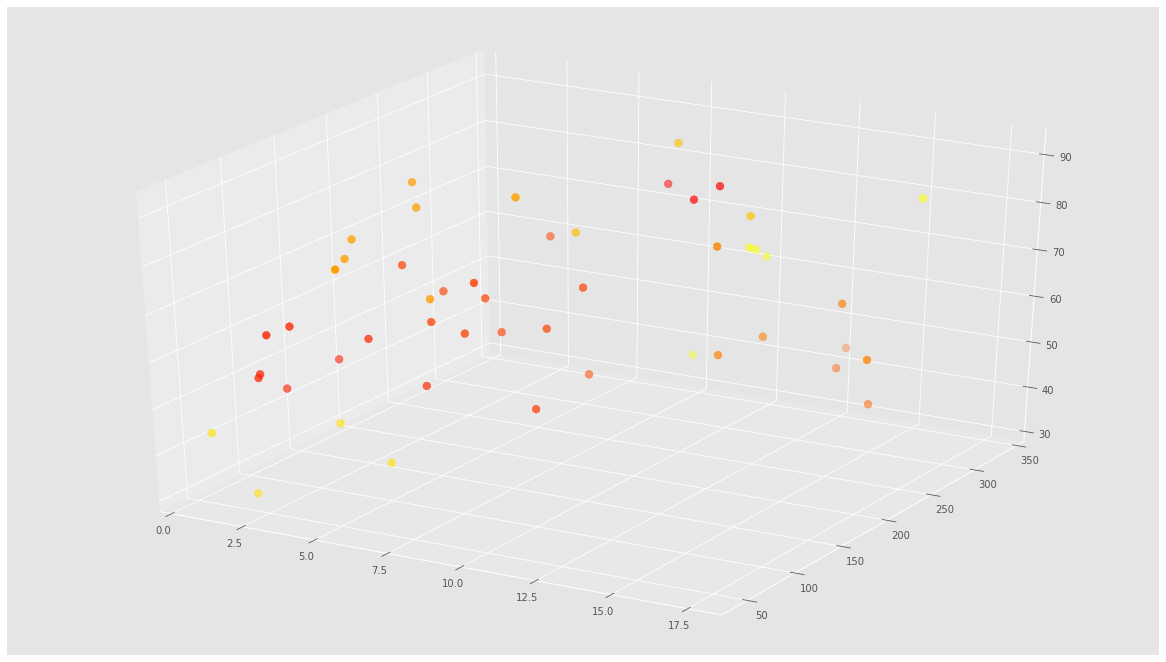

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],X[:,3], c=labels,s=60,cmap="autumn")

In [9]:
kmeans = KMeans(n_clusters=2)
kkmeans= kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  4.84137931 109.75862069  64.03448276  16.24827586]
 [ 11.85714286 255.          67.61904762  28.11428571]]


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


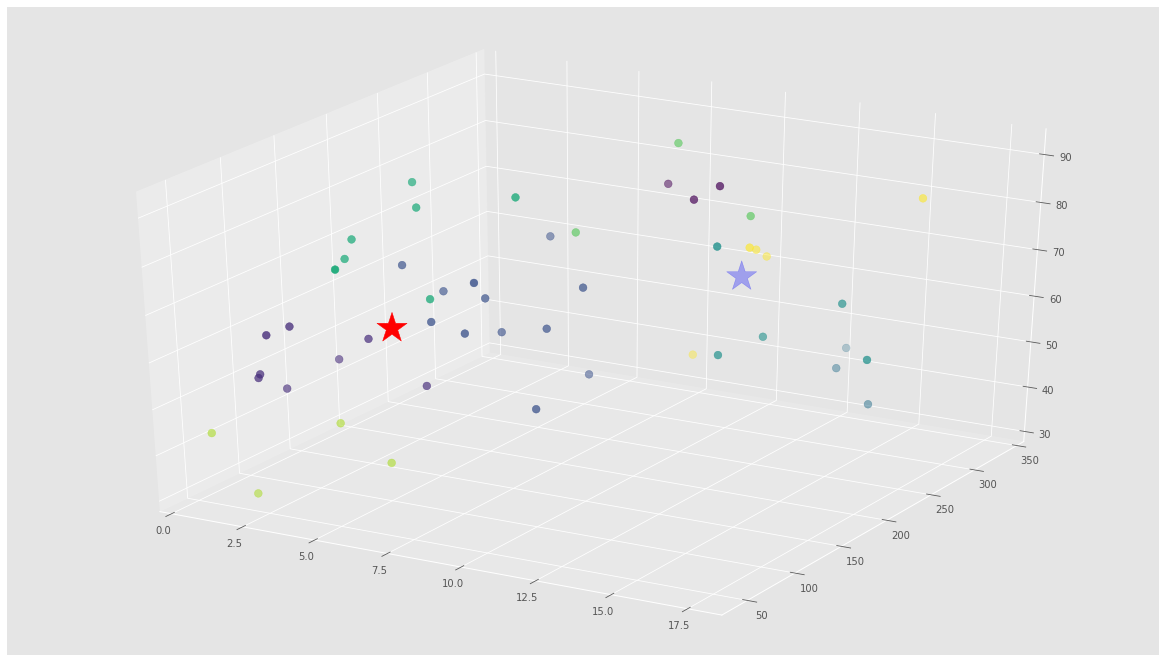

In [10]:
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','blue']
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],X[:,3], c=labels,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000,cmap="autumn")

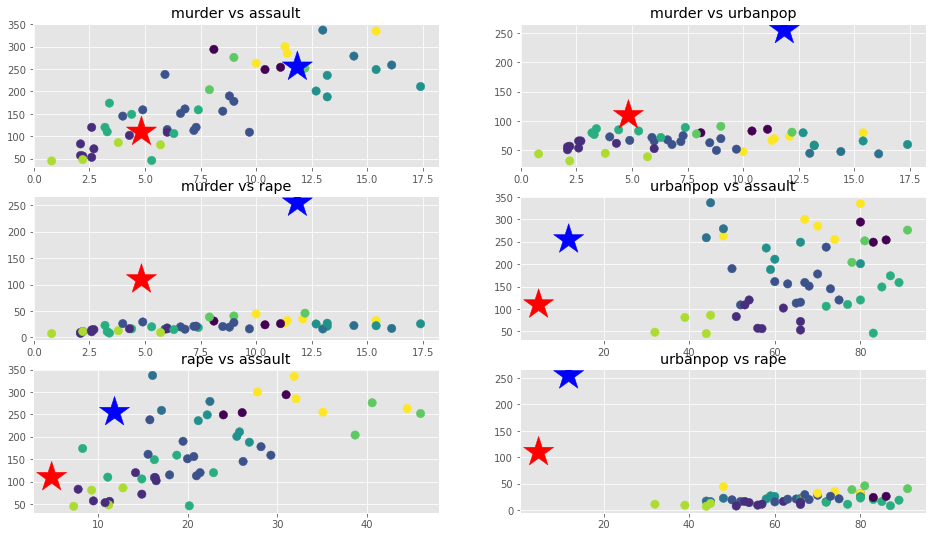

In [11]:
#hacemos las proyecciones del plot en 3D anterior, para ver la diferenciazion de los grupos
f1 = dataframe['Murder'].values
f2 = dataframe['Assault'].values
f3 = dataframe['UrbanPop'].values
f4 = dataframe['Rape'].values 

fig, ax = plt.subplots(3,2)
ax[0,0].scatter(f1, f2, c=labels, s=70)
ax[0,0].scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
ax[0,0].set_title('murder vs assault')


ax[0,1].scatter(f1, f3, c=labels, s=70)
ax[0,1].scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
ax[0,1].set_title('murder vs urbanpop')


ax[1,0].scatter(f1, f4, c=labels, s=70)
ax[1,0].scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
ax[1,0].set_title('murder vs rape')


ax[1,1].scatter(f3, f2, c=labels, s=70)
ax[1,1].scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
ax[1,1].set_title('urbanpop vs assault')


ax[2,0].scatter(f4, f2, c=labels, s=70)
ax[2,0].scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
ax[2,0].set_title('rape vs assault')


ax[2,1].scatter(f3, f4, c=labels, s=70)
ax[2,1].scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
ax[2,1].set_title('urbanpop vs rape')

plt.show()

In [12]:
y_kmeans1=kkmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
dataframe['cluster'] = cluster


df_estado_cluster = dataframe.loc[:,['cluster','State']] #almacenamos los estados con sus respectivos clusteres en un nuevo dataframe
df_estado_cluster.head(20)

,cluster,State
0,2,Alabama
1,2,Alaska
2,2,Arizona
3,2,Arkansas
4,2,California
5,2,Colorado
6,1,Connecticut
7,2,Delaware
8,2,Florida
9,2,Georgia
